\newpage

1

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

# variable information 
print(chronic_kidney_disease.variables) 

     name     role         type demographic              description  \
0     age  Feature      Integer         Age                     None   
1      bp  Feature      Integer        None           blood pressure   
2      sg  Feature  Categorical        None         specific gravity   
3      al  Feature  Categorical        None                  albumin   
4      su  Feature  Categorical        None                    sugar   
5     rbc  Feature       Binary        None          red blood cells   
6      pc  Feature       Binary        None                 pus cell   
7     pcc  Feature       Binary        None          pus cell clumps   
8      ba  Feature       Binary        None                 bacteria   
9     bgr  Feature      Integer        None     blood glucose random   
10     bu  Feature      Integer        None               blood urea   
11     sc  Feature   Continuous        None         serum creatinine   
12    sod  Feature      Integer        None                   so

In [3]:
all_data = pd.concat([X,y],axis=1)

In [4]:
all_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Answer: Based on the loaded dataset, the classification problem can be identified as determining whether a patient has chronic kidney disease (CKD) or not. The dataset contains various measurements and test results that could potentially indicate the presence of CKD in patients.

2

Answer: To clean the data for further analysis, the following transformations are applied:

* Binary categories like "yes"/"no" will be mapped to 1/0.
* Other categorical variables with more than two categories will be converted to numerical codes.

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Applying label encoding to categorical variables
# keep missing value
label_encoders = {}
miss_placeholder = 'missing'
numerical_col = list(all_data.select_dtypes(include=['int32', 'float64']))
categorical_col = list(all_data.select_dtypes(include=['object']).columns)
le = LabelEncoder()
for col in categorical_col:
    all_data[col] = all_data[col].fillna(miss_placeholder)
    if miss_placeholder in all_data[col]:
        all_data[col] = le.fit_transform(all_data[col].astype(str))
        placeholder_index = le.transform([miss_placeholder])[0]
        all_data[col].replace(placeholder_index,np.nan, inplace=True)
    else:
        all_data[col] = le.fit_transform(all_data[col].astype(str))

# use 1 for have ckd, 0 for not having ckd
all_data['class'].replace(0,1, inplace=True)
all_data['class'].replace(2,0, inplace=True)

3

In [6]:
all_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
rbc,400.0,1.385000,0.687719,0.000,1.00,2.00,2.00,2.000
pc,400.0,1.457500,0.793579,0.000,1.00,2.00,2.00,2.000
pcc,400.0,1.095000,0.325946,0.000,1.00,1.00,1.00,2.000
ba,400.0,1.045000,0.251262,0.000,1.00,1.00,1.00,2.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000


Answer: 

* Observation Count and Variables: The dataset contains 400 rows and 25 columns

* Clinical measurements might contain outliers, particularly in variables like blood glucose random which can vary widely depending on the patient's condition and dietary intake.

* Patients' age might range widely, from young children to elderly, affecting the kidney function differently across ages


4

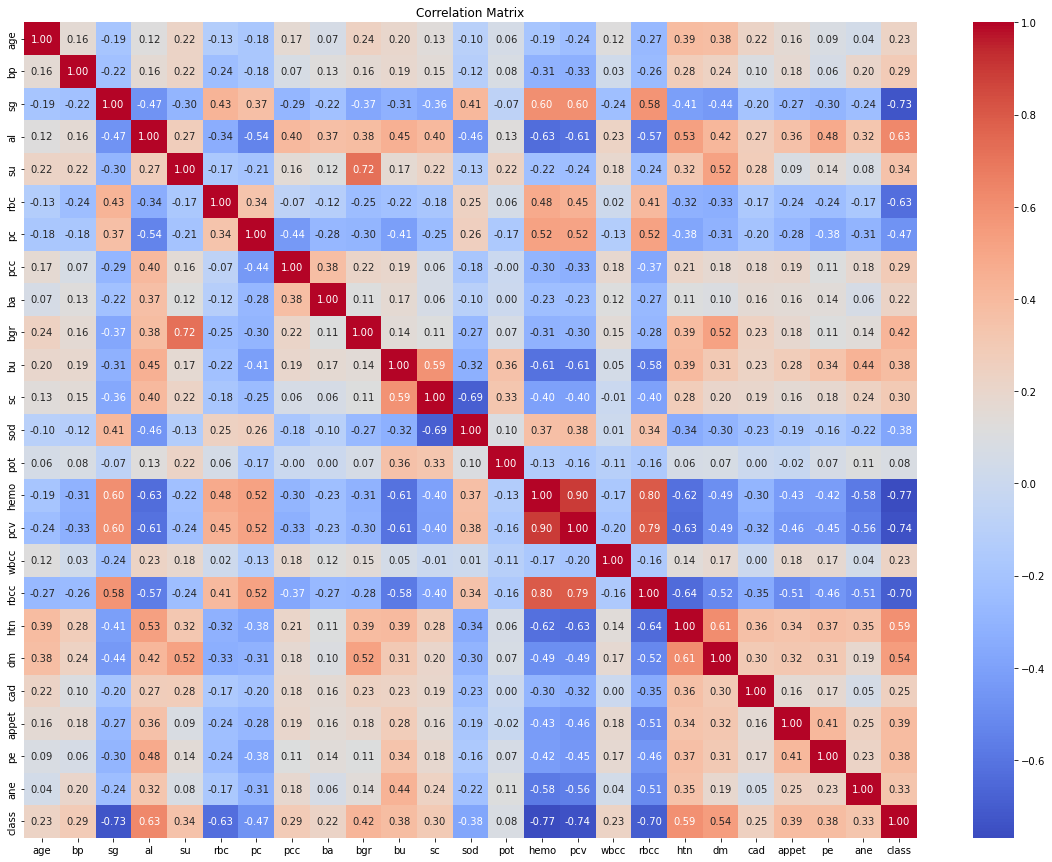

In [7]:
correlation_matrix = all_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Answer: 

* Serum Creatinine (Sc) and Blood Urea (Bu): Another significant positive correlation is observed between 'sc' and 'bu', which could indicate a combined impact of these variables on kidney health, as both are commonly used indicators of renal function.

* Specific Gravity (Sg) and Albumin (Al): There's a negative correlation between 'sg' and 'al', which might be interpreted that higher levels of albumin in the urine (a sign of kidney disease) are often associated with lower urine specific gravity, perhaps due to the kidneys' reduced ability to concentrate urine.

* Blood Pressure (Bp) and Serum Creatinine (Sc): A moderate positive correlation is seen between 'bp' and 'sc', suggesting that higher blood pressure is associated with higher serum creatinine levels, which is a common clinical pattern observed in patients with chronic kidney conditions.

5

Answer: 

For numerical variables, we can use mean or median imputation. 

For categorical variables, we can use the most frequent value (mode) for imputation.

In [8]:
for col in numerical_col:
    all_data[col] = all_data[col].fillna(np.mean(all_data[col])) 
for col in categorical_col:
    all_data[col] = all_data[col].fillna(all_data[col].value_counts().idxmax()) 

6

The outliers should be kept. In medical datasets, what appears to be an outlier could be a critical rare case that's essential for a predictive model to learn from.

7

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

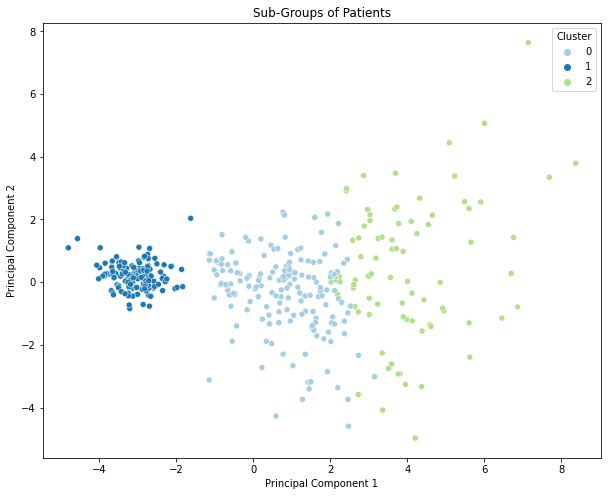

In [10]:
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data)

# Apply K-Means clustering
k_mean = KMeans(n_clusters=3, random_state=1)
clusters = k_mean.fit_predict(all_data_scaled)

# Apply PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(all_data_scaled)

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='Paired')
plt.title('Sub-Groups of Patients')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

From the result, it can be seen the green cluster is a clear sub-group of the dataset.

8

In [11]:
from sklearn.model_selection import train_test_split
X = all_data.drop('class', axis=1)
y = all_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

9

Answer:

* Logistic Regression: This model is favored for its simplicity and interpretability, making it an excellent choice for scenarios such as in medical diagnostics. Its efficiency in computation and ability to provide probabilities for outcomes is particularly useful in binary classification tasks.

* Random Forest: Ideal for handling complex, nonlinear data relationships without extensive pre-processing, Random Forests are robust against overfitting due to their ensemble approach that averages predictions across multiple decision trees. 

10

Answer:

* AUC-ROC
 AUC-ROC is useful for binary classification problems, especially when classes are imbalanced. It provides a single measure of overall model performance and can compare different models' performance without setting a classification threshold. Higher AUC values indicate better model performance.
* F1 Score
The F1 score is the harmonic mean of precision (the ratio of true positives to the sum of true and false positives) and recall (the ratio of true positives to the sum of true positives and false negatives). It balances the trade-off between precision and recall.

11 and 12

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, roc_curve


# Initialize the two classifiers
log_reg = LogisticRegression()
random_forest = RandomForestClassifier(random_state=1)

# Train the logistic regression classifier
log_reg.fit(X_train, y_train)

# Train the random forest classifier
random_forest.fit(X_train, y_train)

# Make predictions with both classifiers
y_pred_lr = log_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Calculate F1 Scores
f1_score_lr = f1_score(y_test, y_pred_lr)
f1_score_rf = f1_score(y_test, y_pred_rf)

print(f'Logistic Regression ROC score: {roc_auc_lr:.4f}')
print(f'Random Forest ROC score: {roc_auc_rf:.4f}')
print(f'Logistic Regression F1 score: {f1_score_lr:.4f}')
print(f'Random Forest F1 score: {f1_score_rf:.4f}')

Logistic Regression ROC score: 0.9876
Random Forest ROC score: 1.0000
Logistic Regression F1 score: 0.9530
Random Forest F1 score: 1.0000


Compare the result, Random Forest is better than logestic regression.

13

In [13]:
feature_importance = pd.DataFrame(log_reg.coef_[0], index=X_train.columns, columns=['Coefficient'])
print(feature_importance.sort_values(by='Coefficient', ascending=False))

       Coefficient
sc        0.158424
al        0.144894
sod       0.102454
appet     0.056116
bp        0.047509
bgr       0.041562
htn       0.040796
pe        0.038069
dm        0.034479
bu        0.024944
su        0.016794
pcc       0.015932
ane       0.015852
cad       0.012012
ba        0.010071
sg        0.002993
wbcc      0.000177
pot      -0.005023
age      -0.022394
pc       -0.043374
rbcc     -0.059370
rbc      -0.101766
hemo     -0.242584
pcv      -0.502294


* negative coefficient for hemoglobin points to its critical role in CKD diagnosis. Lower hemoglobin levels, which occur with anemia associated with kidney disease, significantly increase the likelihood of CKD. This connection emphasizes the kidney's role in producing hormones that stimulate red blood cell production.

* The negative coefficient for Red Blood Cell Count (rbc) suggests that a lower red blood cell count is associated with higher odds of CKD.

* The positive coefficient for serum creatinine (sc) indicates that higher levels of creatinine in the blood are associated with an increased risk of CKD. Elevated creatinine levels often signal reduced kidney function, as creatinine is a waste product filtered out by healthy kidneys.

15

* Yuchen Wang did question 1-7
* Shilin Wang did question 8-16

16

https://github.com/wangy773/STATS-3DA3-A6